# 예제 7-3 다중회귀분석 

### 기본 라이브러리 불러오기 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1-3 데이터 준비 

### CSV 파일을 데이터프레임으로 변환 

In [3]:
df = pd.read_csv('./auto-mpg.csv', header=None)

### 열 이름 지정 

In [4]:
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
             'acceleration', 'model year', 'origin', 'name']

### horsepower 열의 자료형 변경(문자열 -> 숫자) 

In [8]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

### 분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량) 

In [9]:
ndf = df[['mpg', 'cylinders','horsepower', 'weight']]

## Step 4 데이터셋 구분 - 훈련용/검증용 

### 속성(변수) 선택 

In [10]:
X = ndf[['cylinders', 'horsepower', 'weight']]
Y = ndf['mpg']

### train data와 test data로 구분 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)

In [13]:
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


## Step 5 다중회귀분석 모형 - sklearn 사용 

### sklearn 라이브러리에서 선형회귀분석 모듈 가져오기 

In [14]:
from sklearn.linear_model import LinearRegression

### 다중회귀분석 모형 객체 생성 

In [15]:
lr = LinearRegression()

### train data를 가지고 모형 학습 

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

### 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산 

In [17]:
r_square = lr.score(X_test, Y_test)
r_square

0.6939048496695598

### 회귀식의 기울기 

In [18]:
print('X 변수의 계수 a: ', lr.coef_)

X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


### 회귀식의 y절편 

In [19]:
print('상수항 b: ',lr.intercept_)

상수항 b:  46.41435126963407


### train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 

In [20]:
y_hat = lr.predict(X_test)

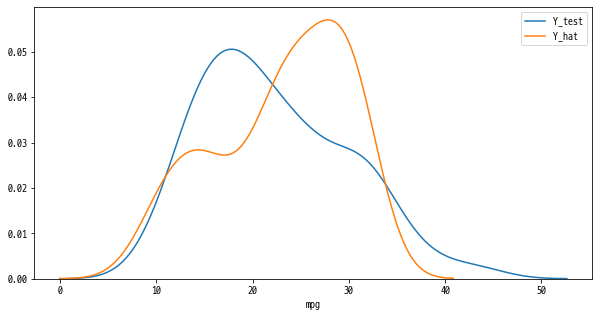

In [22]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y_test, hist=False, label='Y_test')
ax2 = sns.distplot(y_hat, hist=False, label='Y_hat', ax=ax1)